## Getting Dependencies

In [1]:
%%time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn import tree

CPU times: user 1.07 s, sys: 287 ms, total: 1.36 s
Wall time: 856 ms


# Calibration of the Glucometer

## Mapping Microcontroller Values to Glucose Concentration

In [2]:
CalData = pd.read_excel('DiabeaTiT_Calibration Data.xlsx')
CalData.head()

,Unnamed: 0,Test Solution Concentration,Output values from Microcontroller
0,0,0.300000,110.465128
1,1,0.313568,193.581632
2,2,0.327136,147.273854
3,3,0.340704,35.719369
4,4,0.354271,73.565196


Text(0.5, 1.0, 'Calibration Data')

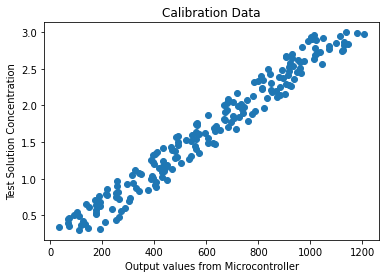

In [3]:
plt.scatter(np.array(CalData['Output values from Microcontroller']),np.array(CalData['Test Solution Concentration']))
plt.xlabel('Output values from Microcontroller')
plt.ylabel('Test Solution Concentration')
plt.title('Calibration Data')

## Reshape Data

In [4]:
X_Micro = np.array(CalData['Output values from Microcontroller']).reshape(-1,1)
X_Sal = np.array(CalData['Test Solution Concentration']).reshape(-1,1)

## Accuracy Function and Split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_Micro, X_Sal, random_state = 0) 
Error_Percent = {}
trained_models = {}
def score(x,y):
    x = np.array(x)
    y = np.array(y)    
    return 100 - np.mean((x-y)**2)**0.5*100/np.mean(x)

## Correlation between Microcontroller Values and Glucose Concentration

### Information Entropy based algorithms 

30.457604359076072


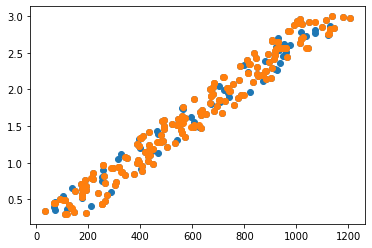

In [6]:
regr = DecisionTreeRegressor(max_depth=10)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
Error_Percent['Information Entropy based ML algorithms'] = score(y_test,y_pred)
print(score(y_test,y_pred))
y_predf = regr.predict(X_Micro)
plt.scatter(X_Micro,X_Sal)
plt.scatter(X_Micro,y_predf)
trained_models['Information Entropy based ML algorithms'] = regr

### Polynomial regression using gradient dissent

 Accuracy Percentage:  91.32258278586714 
 Degree of Polynomial:  3


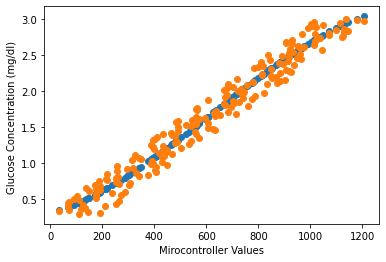

In [7]:
from sklearn.preprocessing import PolynomialFeatures

models = []
# Test upto 10 degree polynomial

for j in range(10):
    poly = PolynomialFeatures(degree=j)
    poly_x = poly.fit_transform(X_train)
    models.append(poly_x)

from sklearn.linear_model import LinearRegression

regressors = []
y_preds = []
mses = []

for model in models:
    regressor = LinearRegression()
    regressor.fit(model,y_train)
    regressors.append(regressor)

j=0
min_mse = -1
minj = -1

for regressor in regressors:
    poly = PolynomialFeatures(degree=j)
    poly_x = poly.fit_transform(X_test)    
    y_pred  = regressor.predict(poly_x)
    mse = 100 - score(y_test,y_pred)
    
    if(j==0):
        min_mse = mse
        minj = 0
    elif(min_mse>mse):
        min_mse = mse
        minj = j
    j+=1


print(' Accuracy Percentage: ',100- min_mse, '\n' , 'Degree of Polynomial: ',minj)
Error_Percent['Polynomial_Regression'] = min_mse
poly = PolynomialFeatures(degree=minj)
poly_x = poly.fit_transform(X_Micro)    
y_pred  = regressors[minj].predict(poly_x)
plt.scatter(X_Micro,y_pred)
plt.scatter(X_Micro,X_Sal)
#plt.title('Microcontroller Values against Glucose Concentration')
plt.xlabel('Mirocontroller Values')
plt.ylabel('Glucose Concentration (mg/dl) ')
trained_models['Polynomial_Regression'] = regressors[minj]
ArdtoGlc = regressors[minj]

# Mapping Glucose Concentration in Saliva to that of Blood

## Read Data

In [8]:
Sal_to_Blood_Data = pd.read_excel('DiabeaTiT_SaltoBlood.xlsx')
Sal_to_Blood_Data.head()

,Unnamed: 0,Salivary Glucose Concentration,Blood Glucose Concentration
0,0,1.296094,110.260027
1,1,1.301530,65.923150
2,2,1.411458,96.978819
3,3,1.436916,94.776040
4,4,1.357038,99.435002


## Reshape and split Data

In [9]:
X_Sal1 = np.array(Sal_to_Blood_Data['Salivary Glucose Concentration']).reshape(-1,1)
Y_Blood_Glucose = np.array(Sal_to_Blood_Data['Blood Glucose Concentration']).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_Sal1, Y_Blood_Glucose, random_state = 0) 
Error_Percent = {}
trained_models = {}

## Training Models

### Information Entropy based algorithms 

Accuracy:  59.6090135577743


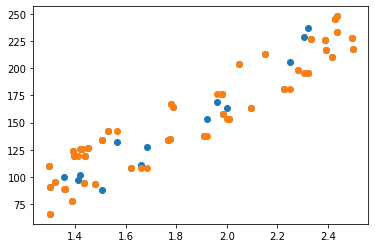

In [10]:
regr = DecisionTreeRegressor(max_depth=10)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
Error_Percent['Information Entropy based ML algorithms'] = score(y_test,y_pred)
print("Accuracy: ",score(y_test,y_pred))
y_predf = regr.predict(X_Sal1)
plt.scatter(X_Sal1,Y_Blood_Glucose)
plt.scatter(X_Sal1,y_predf)
trained_models['Information Entropy based ML algorithms'] = regr

### Polynomial regression using gradient dissent

 Accuracy:  90.05522810058584 
 Degree of Polynomial:  2


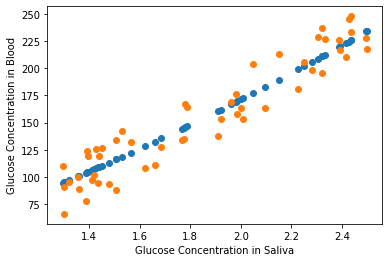

In [11]:
from sklearn.preprocessing import PolynomialFeatures

models = []
# Test upto 10 degree polynomial

for j in range(10):
    poly = PolynomialFeatures(degree=j)
    poly_x = poly.fit_transform(X_train)
    models.append(poly_x)

from sklearn.linear_model import LinearRegression

regressors = []
y_preds = []
mses = []

for model in models:
    regressor = LinearRegression()
    regressor.fit(model,y_train)
    regressors.append(regressor)

j=0
min_mse = -1
minj = -1

for regressor in regressors:
    poly = PolynomialFeatures(degree=j)
    poly_x = poly.fit_transform(X_test)    
    y_pred  = regressor.predict(poly_x)
    mse = 100 - score(y_test,y_pred)
    
    if(j==0):
        min_mse = mse
        minj = 0
    elif(min_mse>mse):
        min_mse = mse
        minj = j
    j+=1

print(' Accuracy: ', 100-min_mse, '\n' , 'Degree of Polynomial: ',minj)
Error_Percent['Polynomial_Regression'] = min_mse
poly = PolynomialFeatures(degree=minj)
poly_x = poly.fit_transform(X_Sal1)    
y_pred  = regressors[minj].predict(poly_x)
plt.scatter(X_Sal1,y_pred)
plt.scatter(X_Sal1,Y_Blood_Glucose)
plt.xlabel('Glucose Concentration in Saliva')
plt.ylabel('Glucose Concentration in Blood')
trained_models['Polynomial_Regression'] = regressors[minj]
SaltoBloodGlc = regressors[minj]
l = SaltoBloodGlc.coef_

### Write the outcomes to another excel files

In [12]:
dfx = pd.DataFrame()
dfx['Salivary glucose level'] = X_Sal1.reshape(X_Sal1.shape[0])
dfx['Actual blood level'] = Y_Blood_Glucose.reshape(Y_Blood_Glucose.shape[0])
dfx['Predicted blood glucose level'] = y_pred.reshape(y_pred.shape[0])
dfx.to_excel('ThreeCols.xlsx')

# Final Calibration: Microcontroller Values to Blood Glucose Concentration

## Function to return Blood Glucose Level based on Microcontroller Values

In [13]:
def MctoBlood(x):
    x = np.array([x]).reshape(-1,1)
    y = ArdtoGlc.predict(PolynomialFeatures(degree=3).fit_transform(x))
    y = np.array([y]).reshape(-1,1)
    z = SaltoBloodGlc.predict(PolynomialFeatures(degree=2).fit_transform(y))
    return int(z)

In [14]:
MicroController_to_Blood_Glucose = np.array([MctoBlood(i) for i in range(1024)])[350:]
f = np.arange(350,1024)

Text(0, 0.5, 'Glucose Concentration in Blood')

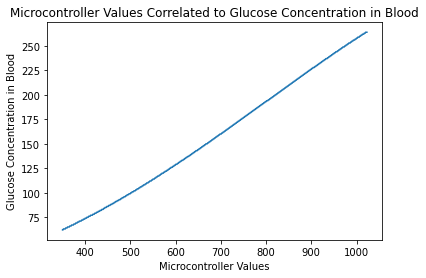

In [15]:
plt.plot(f,MicroController_to_Blood_Glucose)
plt.title('Microcontroller Values Correlated to Glucose Concentration in Blood')
plt.xlabel('Microcontroller Values')
plt.ylabel('Glucose Concentration in Blood')

## Store the Obtained Array into an Excel File

In [16]:
df3 = pd.DataFrame()
df3['MicroController Values'] = f
df3['Blood Glucose Concentration Values'] = MicroController_to_Blood_Glucose
df3.to_excel('DiabeaTiT_MicroController_to_Blood_Glucose.xlsx')

# Final Coefficients

In [17]:
ArdtoGlc.coef_

array([[ 0.00000000e+00,  1.03820866e-03,  2.85167552e-06,
        -1.52347882e-09]])

In [18]:
ArdtoGlc.coef_

array([[ 0.00000000e+00,  1.03820866e-03,  2.85167552e-06,
        -1.52347882e-09]])

In [19]:
SaltoBloodGlc.coef_

array([[ 0.        , 61.58593563, 14.3749855 ]])

# Binary Analysis | Classification of Patients as Diabateic and Non-Diabetic

### Threshold For Determining Diabetes

In [20]:
# Threshold BGL for Diabetes
D_th = 200

In [21]:
def predict(x):
    return SaltoBloodGlc.predict(poly.fit_transform(np.array([x]).reshape(-1,1)))[0][0]

In [22]:
predicted_levels = [predict(i) for i in np.array(Sal_to_Blood_Data['Salivary Glucose Concentration'])]
true_levels = np.array(Sal_to_Blood_Data['Blood Glucose Concentration']).reshape(-1,1)

Text(0, 0.5, 'Blood Glucose Level')

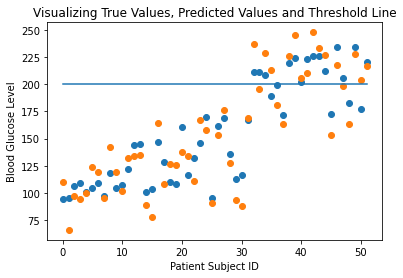

In [23]:
plt.scatter(np.arange(len(true_levels)),predicted_levels)
plt.scatter(np.arange(len(true_levels)),true_levels)
plt.plot(np.arange(len(true_levels)),[D_th for i in range(len(true_levels))])
plt.title('Visualizing True Values, Predicted Values and Threshold Line')
plt.xlabel('Patient Subject ID')
plt.ylabel('Blood Glucose Level')

## Classification on the basis of Threshold

In [24]:
tp, tn, fp, fn = [], [], [], []

for i in range(len(true_levels)):
    if(true_levels[i]>D_th and predicted_levels[i]>D_th):
        tp.append(i)
    if(true_levels[i]>D_th and predicted_levels[i]<D_th):
        fn.append(i)
    if(true_levels[i]<D_th and predicted_levels[i]>D_th):
        fp.append(i)
    if(true_levels[i]<D_th and predicted_levels[i]<D_th):
        tn.append(i)
        
tpv = [predict(np.array(Sal_to_Blood_Data['Salivary Glucose Concentration'])[i]) for i in tp]
tnv = [predict(np.array(Sal_to_Blood_Data['Salivary Glucose Concentration'])[i]) for i in tn]
fpv = [predict(np.array(Sal_to_Blood_Data['Salivary Glucose Concentration'])[i]) for i in fp]
fnv = [predict(np.array(Sal_to_Blood_Data['Salivary Glucose Concentration'])[i]) for i in fn]

## Classified Plot

In [ ]:
plt.scatter(tp,tpv, c='b')
plt.scatter(tn,tnv, c='g')
plt.scatter(fp,fpv, c='k')
plt.scatter(fn,fnv, c='r')

plt.title('Classified Plot')
plt.xlabel('Patient Subject Serial Number')
plt.ylabel('Blood Sugar Level')

display("Green: People without diabates and diagnosed by device as non-diabetic")
display("Blue: People with diabates and diagnosed by device as diabetic")
display("Red: People with diabates and diagnosed by device as non-diabetic")
display("Black: People without diabates and diagnosed by device as diabetic")

## Confusion Matrix Plot

In [ ]:
yp = []
yt = []
for i in predicted_levels:
    if(i>D_th):
        yp.append(1)
    else:
        yp.append(0) 
for i in true_levels:
    if(i>D_th):
        yt.append(1)
    else:
        yt.append(0)

ConMat = [[len(tn),len(fn)],[len(fp),len(tp)]]
print("Confusion Matrix: ")
print(ConMat[0])
print(ConMat[1])
print('')
print('Precision =', len(tp)/(len(tp)+len(fp)))
print('Recall = ',len(tp)/len(tp)+len(fn))
plt.imshow(ConMat)
